In [1]:
!pip install xgboost


  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-win_amd64.whl (150.0 MB)


In [2]:
import sys
print(sys.executable)


C:\Users\admin\fakenews_env\Scripts\python.exe


In [7]:
# --- Imports ---
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# --- Load Data ---
X_train = pd.read_csv("data/processed/X_train.csv")
X_test = pd.read_csv("data/processed/X_test.csv")
y_train = pd.read_csv("data/processed/y_train.csv").squeeze()
y_test = pd.read_csv("data/processed/y_test.csv").squeeze()


In [4]:
# --- Define Models ---
models = {
    "MultinomialNB": MultinomialNB(),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = {}

# --- Train and Evaluate ---
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Cross-Validated Accuracy: {cv_score:.4f}")
    print("Classification Report:")
    print(report)
    
    results[name] = {
        "model": model,
        "accuracy": acc,
        "cv_accuracy": cv_score,
        "report": report,
        "preds": preds
    }



=== MultinomialNB ===
Accuracy: 0.8493
Cross-Validated Accuracy: 0.8526
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2964
           1       0.78      0.78      0.78      2715
           2       0.47      0.36      0.41       235
           3       0.85      0.84      0.84      7243
           4       0.83      0.87      0.85      3277

    accuracy                           0.85     16434
   macro avg       0.78      0.76      0.77     16434
weighted avg       0.85      0.85      0.85     16434


=== RandomForest ===
Accuracy: 0.9353
Cross-Validated Accuracy: 0.9357
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2964
           1       0.99      0.98      0.98      2715
           2       0.07      0.06      0.07       235
           3       0.94      0.97      0.96      7243
           4       0.88      0.87      0.87      

C:\Users\admin\fakenews_env\lib\site-packages\xgboost\training.py:183: UserWarning: [23:46:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\admin\fakenews_env\lib\site-packages\xgboost\training.py:183: UserWarning: [00:02:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\admin\fakenews_env\lib\site-packages\xgboost\training.py:183: UserWarning: [00:14:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\admin\fakenews_env\lib\site-packages\xgboost\training.py:183: UserWarning: [00:27:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bs


=== XGBoost ===
Accuracy: 0.9441
Cross-Validated Accuracy: 0.9440
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2964
           1       0.99      0.98      0.99      2715
           2       0.18      0.20      0.19       235
           3       0.96      0.97      0.97      7243
           4       0.88      0.88      0.88      3277

    accuracy                           0.94     16434
   macro avg       0.80      0.80      0.80     16434
weighted avg       0.95      0.94      0.94     16434




✅ Best Model: XGBoost


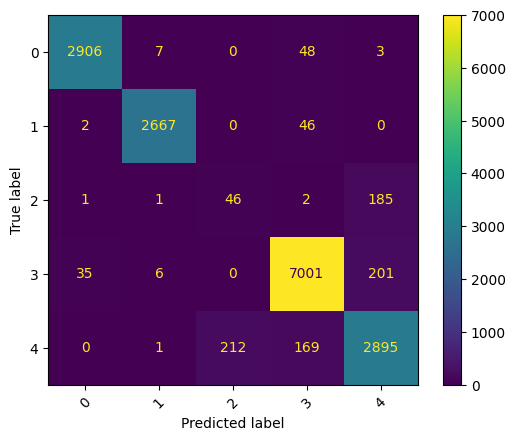

In [5]:
# --- Select Best Model by Cross-Val Accuracy ---
best_model_name = max(results, key=lambda x: results[x]["cv_accuracy"])
best_model = results[best_model_name]["model"]
best_preds = results[best_model_name]["preds"]

# --- Confusion Matrix ---
print(f"\n✅ Best Model: {best_model_name}")
cm = confusion_matrix(y_test, best_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(xticks_rotation=45)


In [8]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# === 2. Train XGBoost Model ===
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# === 3. Evaluate ===
preds = xgb_model.predict(X_test)

acc = accuracy_score(y_test, preds)
report = classification_report(y_test, preds)

print(f"✅ Accuracy: {acc:.4f}")
print("\n📊 Classification Report:\n", report)

# === 4. Save Model ===
joblib.dump(xgb_model, "models/xgb_subject_classifier.pkl")
print("📦 XGBoost model saved to: models/xgb_subject_classifier.pkl")


C:\Users\admin\fakenews_env\lib\site-packages\xgboost\training.py:183: UserWarning: [12:51:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.9441

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2964
           1       0.99      0.98      0.99      2715
           2       0.18      0.20      0.19       235
           3       0.96      0.97      0.97      7243
           4       0.88      0.88      0.88      3277

    accuracy                           0.94     16434
   macro avg       0.80      0.80      0.80     16434
weighted avg       0.95      0.94      0.94     16434

📦 XGBoost model saved to: models/xgb_subject_classifier.pkl
